<a href="https://colab.research.google.com/github/mounikq/datascience/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis (Advertising)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/analysis advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
for i in ['TV', 'Radio', 'Newspaper']:
    df[i] = df[i]*1000

In [ ]:
df['Sales'] = df['Sales']*1000000

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230100.0,37800.0,69200.0,22100000.0
1,44500.0,39300.0,45100.0,10400000.0
2,17200.0,45900.0,69300.0,9300000.0
3,151500.0,41300.0,58500.0,18500000.0
4,180800.0,10800.0,58400.0,12900000.0


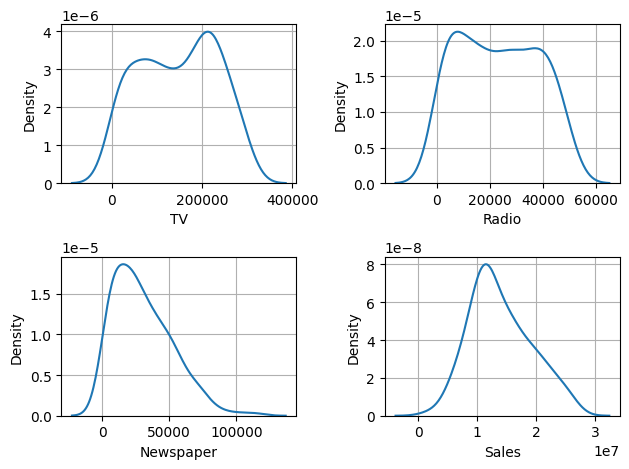

In [ ]:
r=2
c=2
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

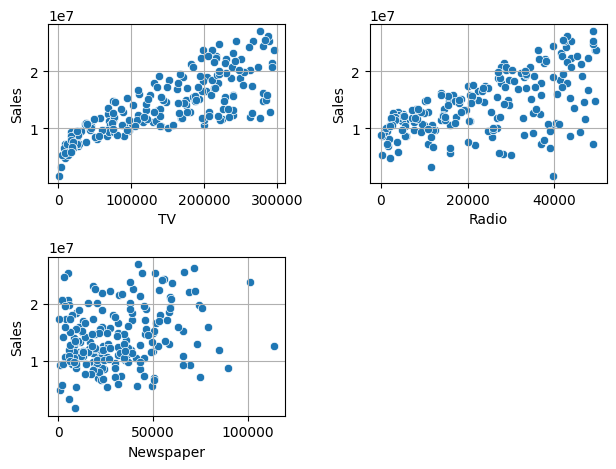

In [ ]:
r=2
c=2
it=1
for i in ['TV', 'Radio', 'Newspaper']:
    plt.subplot(r,c,it)
    sns.scatterplot(x=df[i],y='Sales',data=df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
y = df['Sales']
x = df.drop('Sales',axis=1)

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [ ]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        10:39:08   Log-Likelihood:                -3149.3
No. Observations:                 200   AIC:                             6307.
Df Residuals:                     196   BIC:                             6320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.402e+07   1.19e+05    117.655      0.0

In [ ]:
xc = xc.drop('Newspaper',axis=1)
model = sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.83e-98
Time:                        10:39:31   Log-Likelihood:                -3149.3
No. Observations:                 200   AIC:                             6305.
Df Residuals:                     197   BIC:                             6314.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.402e+07   1.19e+05    117.945      0.0

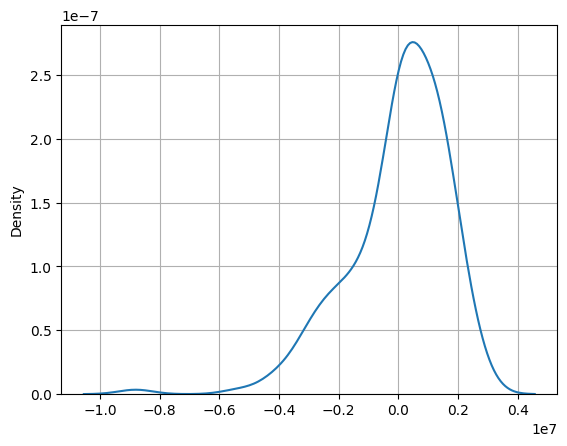

In [ ]:
sns.kdeplot(model.resid)
plt.grid()
plt.show()


In [ ]:
import scipy.stats as stats

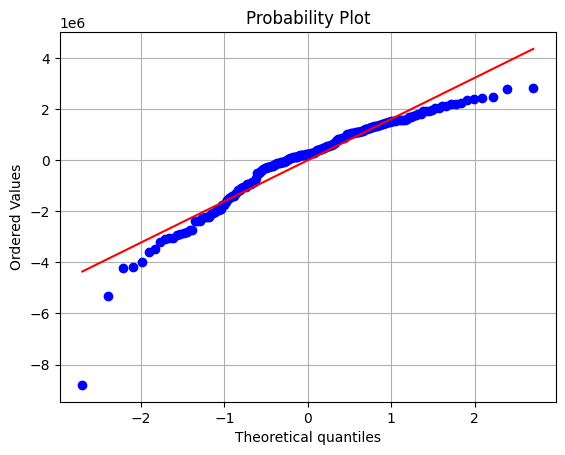

In [ ]:
stats.probplot(x=model.resid,plot=plt)
plt.grid()
plt.show()